<div>
<h1 align='center'>LAB 02 - LINEAR REGRESSION</h1>
<p>This lab uses the Medical Insurance Price Prediction from Kaggle (https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction/data) to train Linear Regression models.</p>
<p>This notebook trains the single, multiple linear regression models using Tensorflow and Sklearn libraries, while the DNN Linear Regression with single and multiple features will be trained using Tensorflow library.</p>
</div>

<div>
    <ol>
        <li>Import Neccessary Packages</li>
        <li>Load Dataset, Data Inspection</li>
        <li>Encoding</li>
        <li>Train Test Split</li>
    </ol>
<div/>
<div>
    <ul>
        <li>
            A. Linear Regression Using Tensorflow
            <ul>
                <li>Single Feature</li>
                <li>Multiple Features</li>
            <ul/>
        </li>
        <li>
            B. Linear Regression Using Sklearn
            <ul>
                <li>Single Feature</li>
                <li>Multiple Features</li>
            <ul/>
        </li>
        <li>
            C. DNN Linear Regression
            <ul>
                <li>Single Feature</li>
                <li>Multiple Features</li>
            <ul/>
        </li>
        <li>D. Performance Comparison</li>
    </ul>
<div/>

## 1. Import Neccessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


## 2. Load Dataset, Data Inspection

### 2.1 - Load Dataset
<p>Create a function to load the dataset using absolute path</p>

#### Create the load_dataset() function

In [2]:
def load_dataset():
    current_path = os.getcwd() # Get the current working directory
    data_path = os.path.join(current_path, 'data', 'Medical_insurance.csv') # Join the path to get the datafile
    df = pd.read_csv(data_path) # Use pandas to read the file
    return df

#### Load the dataset

In [3]:
df = load_dataset() # Load the dataset into df variable

### 2.2 - Data Inspection
<p>
    Create a function to inspect the date, including this information:
<ul>
    <li>Data Information</li>
    <li>Data Description</li>
    <li>Data Shape</li>
    <li>Get some first rows of the data</li>
</ul>
</p>

#### Create the data_inspection() function

In [4]:
def data_inspection(dataset):
    print('---- DATA INFORMATION ----')
    print(dataset.info())
    print()
    print('---- DATA DESCRIPTION ----')
    print(dataset.describe().transpose())
    print()
    print('---- DATA SHAPE ----')
    print(dataset.shape)
    print()
    print('---- SAMPLE DATA ----')
    print(dataset.head())

#### Inspect the Data

In [5]:
# Inspect the loaded dataset
data_inspection(df)

---- DATA INFORMATION ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None

---- DATA DESCRIPTION ----
           count          mean           std        min       25%         50%  \
age       2772.0     39.109668     14.081459    18.0000    26.000    39.00000   
bmi       2772.0     30.701349      6.129449    15.9600    26.220    30.44750   
children  2772.0      1.101732      1.214806     0.0000     0.000     1.00000   
charges   2772.0  13261.369959  12151.768945  1121.8739  4687.797  9333.01435   

             

#### Plot the correlation between the variables using sns.pairplot

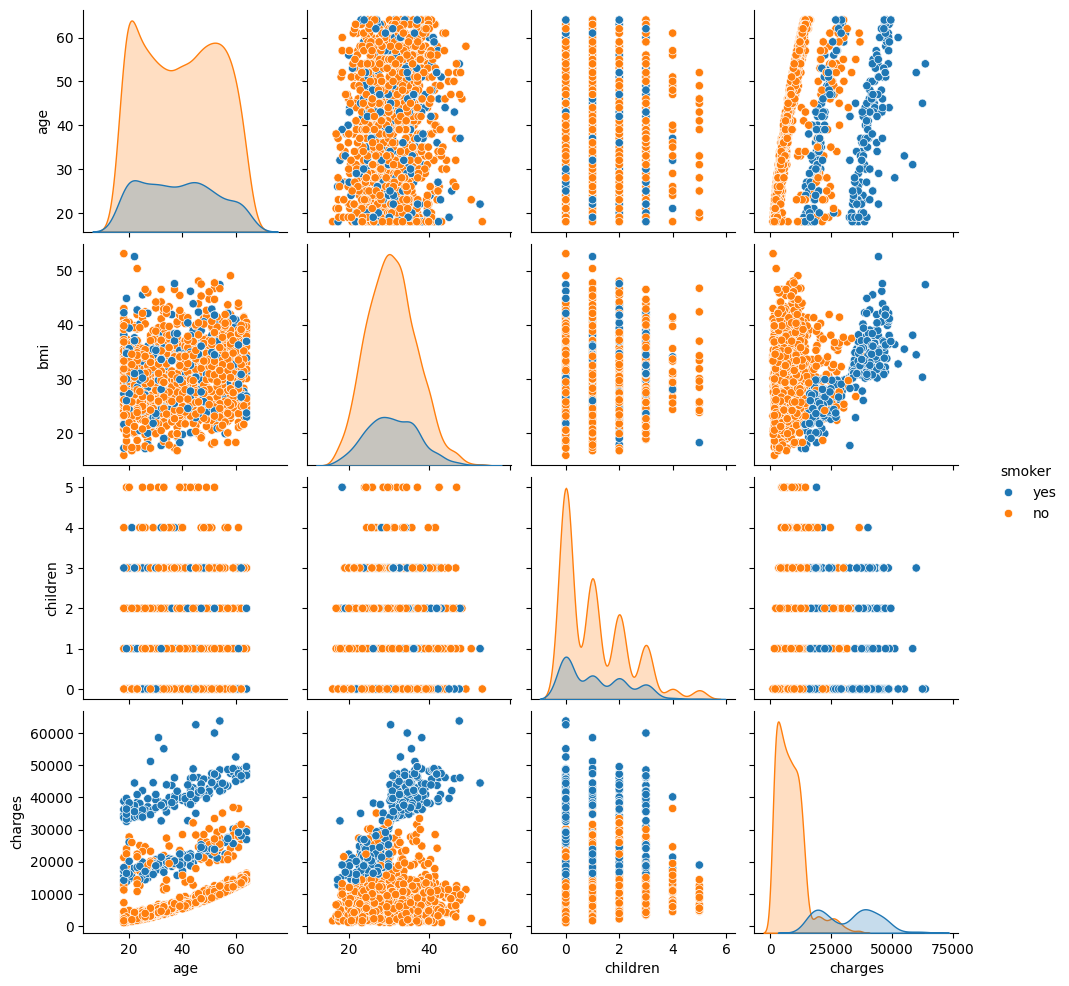

In [6]:
# Using seaborn pairplot to inspect the collinerity between the features
sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], hue='smoker')

## 3. Encoding
<p>From the data inspection step above, we can see that there are some features with values of categorical types. However, for linear regression tasks, we want the data type to be numeric. Therefore, first, we will encode some of the features with categorical values.</p>

<p>pd.get_dummies(data, columns, drop_first=True) is a good method to solve the problems.</p>

In [7]:
# use get_dummies to handle categorical data and stored the encoded dataset in df_encoded
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

#### Drawing heatmap using sns to observe the collinearity and correlation

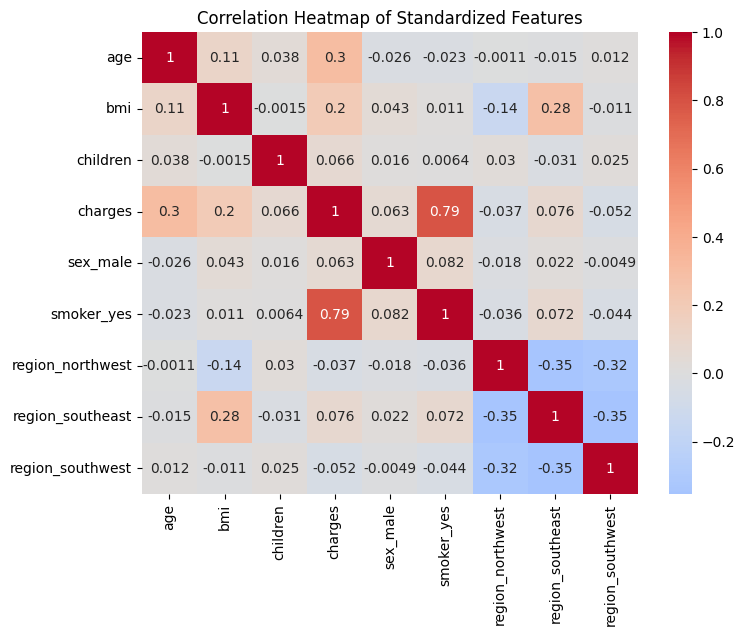

In [8]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Standardized Features")
plt.show()

## 4. Train, Test, Split

#### Define the inputs data and the labels

In [9]:
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

#### Split the data using train_test_split, with test_size = 0.2 and random_state = 42

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

## 5. Defining Features

In [11]:
# Define the training features, which will be used throughout this notebook
training_features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

<div align="center">

# A. Linear Regression Using Tensorflow

</div>

<div align='center'>
    
## SINGLE FEATURE
    
</div>

## 6. Normalization

Create the function to return the normalize layer for training Linear Regression using Tensorflow

In [12]:
# Function to normalize each input
def normalize(feature):
    '''
    This function fill return a Normalization layer for training
    using Tensorflow
    '''
    feature_normalizer = layers.Normalization(input_shape=[1, ], axis=-1)
    feature_normalizer.adapt(feature)
    return feature_normalizer

## 7. Training

#### Build a tf_single_linear_regression() function

This function will perform the linear_regression training per feature in the training_features, it will return a list of histories and models

In [13]:
# loop through all the training features to train model for each feature
def tf_single_linear_regression(training_features, X_train, y_train, learning_rate=0.005, epochs=100, validation_split=0.2):
    '''
    histories - includes all the histories for all models
    final_models - a list containing the dict storing the model, feature, final weight and bias
    '''
    histories = []
    final_models = []
    for training_feature in training_features:
    
        # Reshape the training set
        X = X_train[training_feature].to_numpy().astype(np.float32).reshape(-1,1)
        y = y_train.to_numpy().astype(np.float32)
    
        # normalize feature
        feature_normalizer = normalize(X)
    
        # build a linear regression model
        model = tf.keras.Sequential([
            feature_normalizer,
            layers.Dense(units=1)
        ])
    
        # compile the model
        model.compile(
                optimizer=tf.keras.optimizers.SGD(learning_rate), # use Stochastic Gradient Descent as the optimizer
                loss='mse' # use mean_squared_error as the loss function
            )
    
        # train the model
        history = model.fit(
            X, y,
            epochs=epochs,
            verbose=0,
            validation_split=validation_split
        )
    
        weights, bias = model.layers[-1].get_weights()
        final_models.append({'model': model, 'weight': weights[0][0], 'bias': bias[0] })
        print('Training Model', training_feature, '-- weights:', weights[0][0], ', bias:', bias[0], ', loss:', history.history['loss'][-1])
    
        # save the model_summary into the summaries list
        histories.append({'feature': training_feature, 'history' : history}) 
    return histories, final_models

#### Training the models

In [14]:
# training single linear_regression models
tf_single_histories, tf_single_models = tf_single_linear_regression(training_features, X_train, y_train)

Training Model age -- weights: 3487.3887 , bias: 13442.276 , loss: 135395360.0
Training Model bmi -- weights: 2505.893 , bias: 13388.369 , loss: 141405936.0
Training Model children -- weights: 733.7531 , bias: 13378.741 , loss: 146975856.0
Training Model sex_male -- weights: 729.6477 , bias: 13382.197 , loss: 146928224.0
Training Model smoker_yes -- weights: 9658.986 , bias: 13318.942 , loss: 53837788.0
Training Model region_northwest -- weights: -417.72614 , bias: 13382.45 , loss: 147319312.0
Training Model region_southeast -- weights: 1190.8905 , bias: 13374.6455 , loss: 146191872.0
Training Model region_southwest -- weights: -892.03754 , bias: 13363.833 , loss: 146689664.0


## 8. Test and Plot Results

### 8.1 - Plot the LOSS

#### Create a function to plot the training loss

In [15]:
def plot_single_loss(history, feature_name=None):
    """
    Plot training loss for a single model history.
    """
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title(f"Training Loss ({feature_name})" if feature_name else "Training Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

#### Plot the training loss across all the single_linear models above

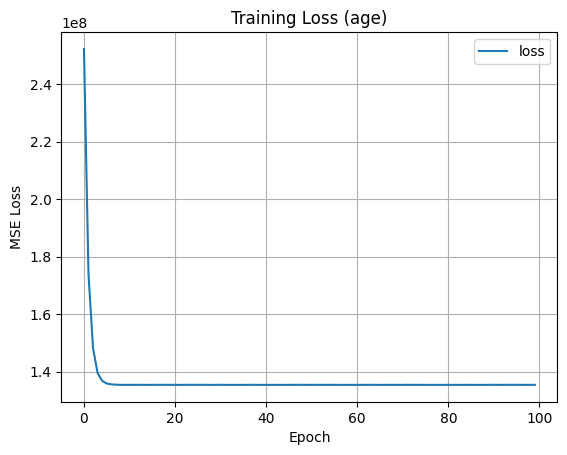

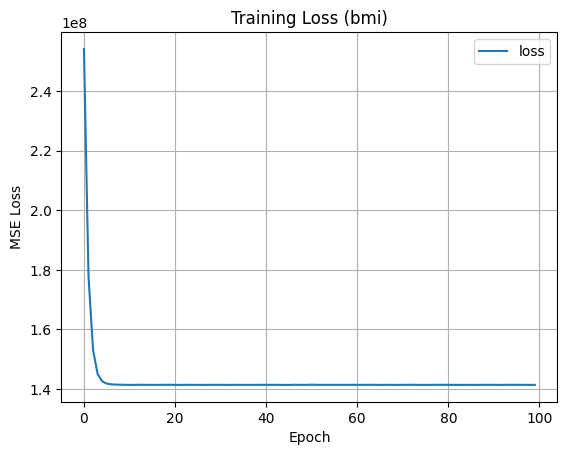

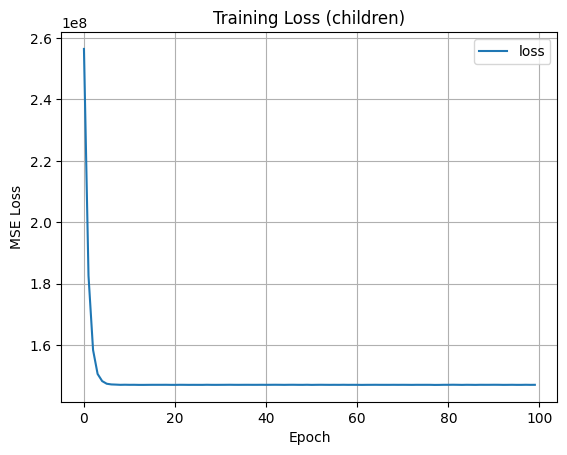

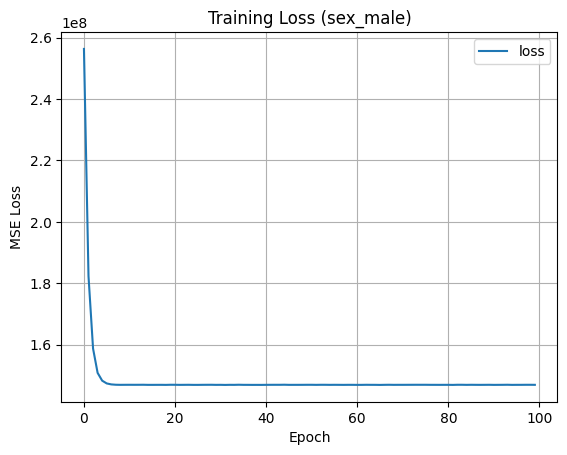

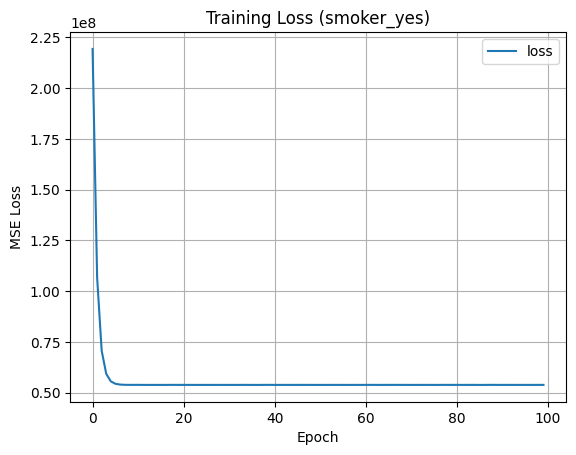

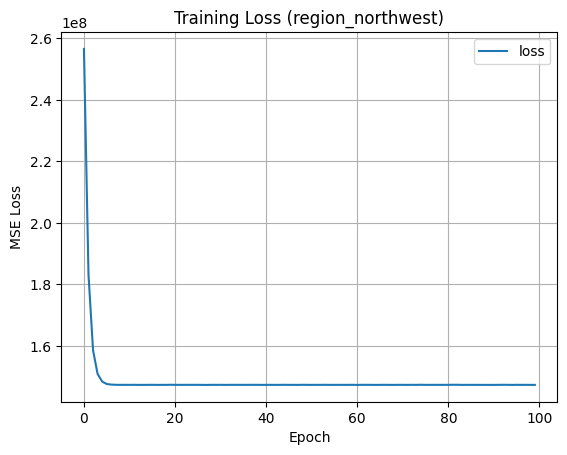

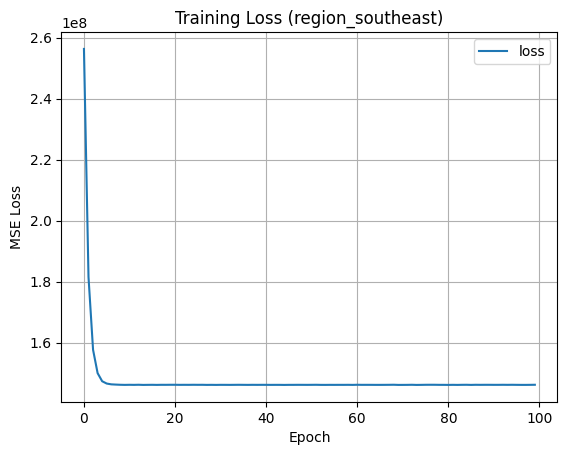

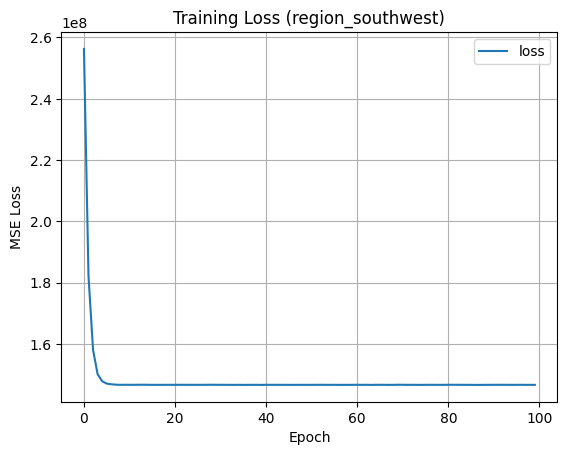

In [16]:
## Plot training loss
for history in tf_single_histories:
    plot_single_loss(history['history'], feature_name=history['feature'])

### 8.1 - Calculate and plot the evaluation metrics scores

#### Create a evaluate_metrics to evaluate the rmse, mae and r2 for single models

In [17]:
def evaluate_metrics(models, training_features, X_train, X_test, y_train, y_test):
    """
    Evaluate multiple models on their respective features and display metrics in a table.
    
    Parameters:
        models: list of dicts, each containing {'model': trained_model}
        training_features: list of feature names, same order as models
        X_train, X_test: pd.DataFrame containing training and test features
        y_train, y_test: pd.Series or np.array containing target values
    """
    results = []

    for model, feature_name in zip(models, training_features):
        # Extract feature column
        X_tr = X_train[[feature_name]].to_numpy()
        X_te = X_test[[feature_name]].to_numpy()
        
        # Predictions
        y_pred_train = model['model'].predict(X_tr).flatten()
        y_pred_test = model['model'].predict(X_te).flatten()
        
        # Calculate metrics
        metrics = {
            'Feature': feature_name,
            'Train RMSE': root_mean_squared_error(y_train, y_pred_train),
            'Test RMSE': root_mean_squared_error(y_test, y_pred_test),
            'Train R2': r2_score(y_train, y_pred_train),
            'Test R2': r2_score(y_test, y_pred_test),
            'Train MAE': mean_absolute_error(y_train, y_pred_train),
            'Test MAE': mean_absolute_error(y_test, y_pred_test)
        }
        results.append(metrics)
    
    # Convert to DataFrame for nice table display
    results_df = pd.DataFrame(results)
    
    # format floats for better readability
    pd.set_option('display.float_format', lambda x: f'{x:.4f}')
    
    return results_df

#### Evaluate the tf_single_linear_regression models above

In [18]:
evaluate_metrics(tf_single_models, training_features, X_train, X_test, y_train, y_test)

18/18 [==============================] - 0s 886us/step


,Feature,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,age,11591.5868,11615.6235,0.0802,0.1209,9177.8108,9057.1175
1,bmi,11861.8718,12077.8847,0.0368,0.0496,9262.9878,9225.4256
2,children,12063.0875,12361.8402,0.0039,0.0043,9147.7942,9275.2709
3,sex_male,12058.5373,12392.6424,0.0046,-0.0006,9144.1642,9240.6851
4,smoker_yes,7372.5516,7839.9507,0.6279,0.5995,5588.3549,5915.4117
5,region_northwest,12078.8627,12390.9562,0.0013,-0.0004,9145.8638,9275.1493
6,region_southeast,12051.1586,12384.3951,0.0058,0.0007,9120.3888,9287.6434
7,region_southwest,12070.2941,12398.1599,0.0027,-0.0015,9111.2916,9217.5206


<div align='center'>
    
## MULTIPLE FEATURES
    
</div>

## 9. Normalization

#### Create a normalize_multiple() function

This funtion will return a normalization layer for training with tensorflow and with multiple features

In [19]:
def normalize_multiple(multiple_feature):
    # Normalize feature
    multiple_feature_normalizer = layers.Normalization(input_shape=[multiple_feature.shape[1], ], axis=-1)
    multiple_feature_normalizer.adapt(multiple_feature)
    return multiple_feature_normalizer

## 10. Training

#### Create a function tf_multiple_linear_regression() to train with multiple features using tf

In [20]:
def tf_multiple_linear_regression(X_train, y_train, learning_rate=0.005, epochs=100, validation_split=0.2):
    X_tr = X_train.to_numpy().astype(np.float32)
    X_tr_normalizer = normalize_multiple(X_tr)
    y_tr = y_train.to_numpy().astype(np.float32)
    
    # Build model
    model = tf.keras.Sequential([
        X_tr_normalizer,
        layers.Dense(units=1)
    ])

    # Compile the model using SGD optimizer and mse as the loss function
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate),
        loss='mse'
    )
    
    # Train with normalized y
    history = model.fit(
        X_tr,
        y_tr,
        epochs=epochs,
        verbose=0,
        validation_split=validation_split
    )
    
    weights, bias = model.layers[-1].get_weights()
    print('Training With Multiple Features')
    print('Weights:', weights[0][0], ', bias:', bias[0], ', loss:', history.history['loss'][-1])
    model = {'model': model, 'weight': weights, 'bias': bias}
    return model, history

#### Train the model using the functions above

In [21]:
# Training a linear regression with multiple features
tf_multiple_model, tf_multiple_history = tf_multiple_linear_regression(X_train, y_train)

Training With Multiple Features
Weights: 3544.202 , bias: 13310.535 , loss: 35279516.0


## 12. Testing and Plot Result

#### Plot the training_loss using plot_single_loss()

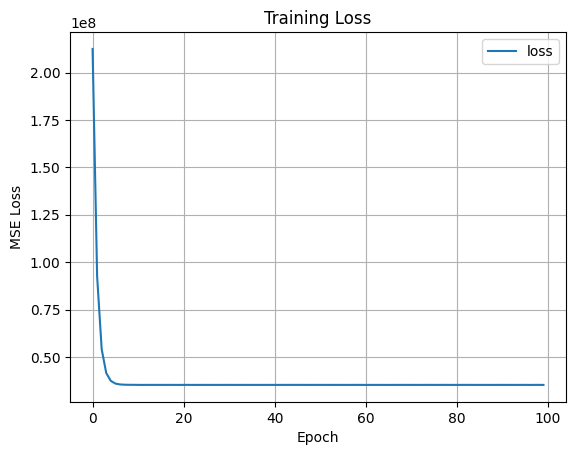

In [22]:
## Plot training loss
plot_single_loss(tf_multiple_history)

#### Create a evaluate_metrics_multiple() function

This function evaluate the model using the three metrics rmse, mae, r2

In [23]:
def evaluate_metrics_multiple(model, X_train, X_test, y_train, y_test):
    results = []
    
    X_train_temp = X_train.to_numpy().astype(np.float32)
    X_test_temp = X_test.to_numpy().astype(np.float32)
    
    y_pred_train = model['model'].predict(X_train_temp).flatten()
    y_pred_test = model['model'].predict(X_test_temp).flatten()
    
    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
                       
    metrics = {
            'Train RMSE': root_mean_squared_error(y_train, y_pred_train),
            'Test RMSE': root_mean_squared_error(y_test, y_pred_test),
            'Train R2': r2_score(y_train, y_pred_train),
            'Test R2': r2_score(y_test, y_pred_test),
            'Train MAE': mean_absolute_error(y_train, y_pred_train),
            'Test MAE': mean_absolute_error(y_test, y_pred_test)
        }
    results.append(metrics)

    # Convert to DataFrame for nice table display
    results_df = pd.DataFrame(results)

    # format floats for better readability
    pd.set_option('display.float_format', lambda x: f'{x:.4f}')

    return results_df

#### Evaluate the tf_multiple_model using the function above

In [24]:
evaluate_metrics_multiple(tf_multiple_model, X_train, X_test, y_train, y_test)

18/18 [==============================] - 0s 966us/step


,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,6001.4886,6324.9955,0.7534,0.7393,4110.9952,4141.6159


#### Create a function to plot the predicted and actual for both training and testing

In [25]:
def plot_predicted_actual(model, X_train, X_test, y_train, y_test):
    # Convert to numpy
    X_train_temp = X_train.to_numpy().astype(np.float32)
    X_test_temp = X_test.to_numpy().astype(np.float32)
    
    # Predictions
    y_pred_train = model['model'].predict(X_train_temp).flatten()
    y_pred_test = model['model'].predict(X_test_temp).flatten()
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
    
    # --- Training ---
    axes[0].scatter(y_train, y_pred_train, alpha=0.6, color="blue")
    axes[0].plot([y_train.min(), y_train.max()],
                 [y_train.min(), y_train.max()],
                 'r--', lw=2)
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")
    axes[0].set_title("Training Set")
    axes[0].grid(True)
    
    # --- Test ---
    axes[1].scatter(y_test, y_pred_test, alpha=0.6, color="green")
    axes[1].plot([y_test.min(), y_test.max()],
                 [y_test.min(), y_test.max()],
                 'r--', lw=2)
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predicted")
    axes[1].set_title("Test Set")
    axes[1].grid(True)
    
    # Adjust layout
    fig.suptitle("Predicted vs Actual (Training & Test)", fontsize=14)
    plt.tight_layout()
    plt.show()

#### Plot the predicted and actual

18/18 [==============================] - 0s 903us/step


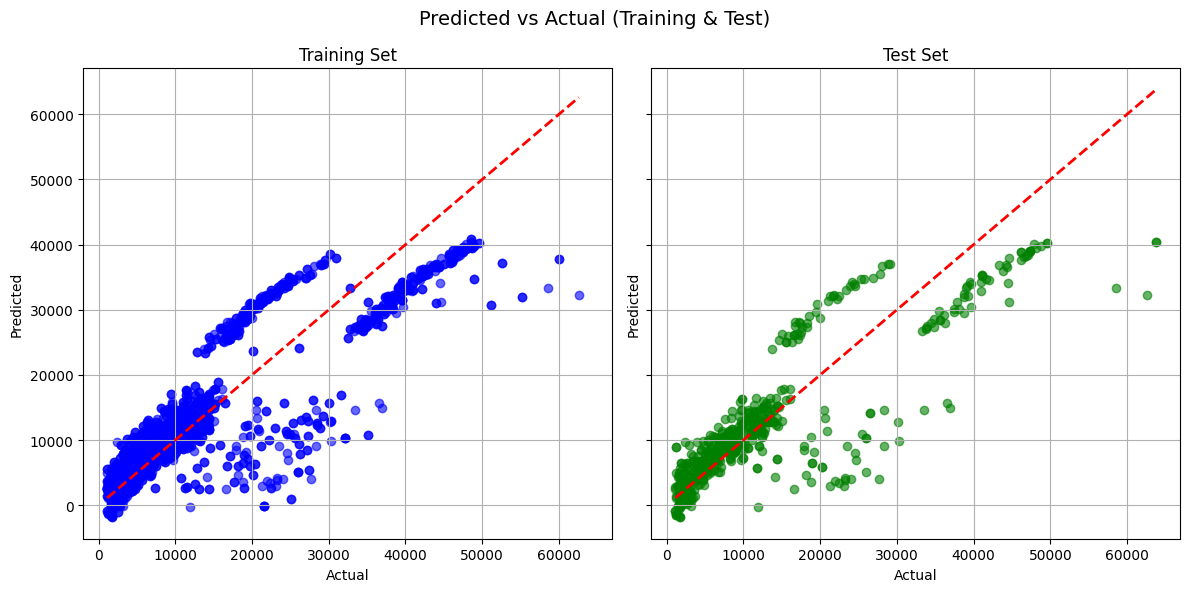

In [26]:
plot_predicted_actual(tf_multiple_model, X_train, X_test, y_train, y_test)

<div align="center">

# B. Linear Regression Using SKLEARN

</div>

<div align='center'>

## Single Feature
    
</div>

## 14. Normalization

In [27]:
# normalize the X_train and X_test using sklearn.preprocessing.StandardScaler()
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6957302 , -0.12954408, -0.91183384, ...,  1.76658366,
        -0.61053699, -0.5716209 ],
       [ 1.62901575, -0.65889522, -0.91183384, ..., -0.56606433,
        -0.61053699, -0.5716209 ],
       [ 1.27005977, -1.7397221 , -0.08638034, ..., -0.56606433,
        -0.61053699,  1.7494112 ],
       ...,
       [-0.88367612,  0.11218748, -0.91183384, ..., -0.56606433,
        -0.61053699,  1.7494112 ],
       [ 0.12140063,  0.14496464, -0.91183384, ..., -0.56606433,
        -0.61053699,  1.7494112 ],
       [ 0.91110379,  0.41537622, -0.91183384, ..., -0.56606433,
        -0.61053699, -0.5716209 ]])

## 15. Training

#### Create a skl_linear_regression() function

This function performs the training for linear_regression with one feature using sklearn library

In [28]:
def skl_single_linear_regression(training_features, X_train, y_train):
    all_models = []
    
    for feature_name in training_features:
        # load the linear regression model
        model = LinearRegression()
    
        # Define the training set X, y
        X_tr = X_train[feature_name].to_numpy().reshape(-1,1)
        y_tr = y_train.to_numpy()
    
        # Fit the model with the data
        model.fit(X_tr, y_tr)
    
        # get the weight and bias
        weight = model.coef_[0]
        bias = model.intercept_
    
        # save the models
        all_models.append({'model': model, 'feature': feature_name, 'weight': weight, 'bias': bias})
        print('Training Model', feature_name, '-- weights:', weight, ', bias:',  bias)
    return all_models

#### Training the model using the function above

In [29]:
skl_single_models = skl_single_linear_regression(training_features, X_train, y_train)

Training Model age -- weights: 245.84769428286648 , bias: 3707.0529109042654
Training Model bmi -- weights: 381.24149575231183 , bias: 1661.0686835585257
Training Model children -- weights: 620.5975593291956 , bias: 12685.533487614255
Training Model sex_male -- weights: 1654.7688778311526 , bias: 12526.14920844977
Training Model smoker_yes -- weights: 23544.510823321645 , bias: 8443.400154630925
Training Model region_northwest -- weights: -1001.3491586465881 , bias: 13614.071724036927
Training Model region_southeast -- weights: 2143.623065959085 , bias: 12788.99868251269
Training Model region_southwest -- weights: -1543.8928977536252 , bias: 13751.302069017358


## 16. Plot and Test the Results

#### Evaluate all the models using the evaluate_metrics() function

In [30]:
evaluate_metrics(skl_single_models, training_features, X_train, X_test, y_train, y_test)

,Feature,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,age,11591.1974,11617.9712,0.0803,0.1206,9144.4335,9025.4073
1,bmi,11860.4991,12082.5910,0.0370,0.0488,9239.5900,9212.2136
2,children,12063.0716,12361.0965,0.0039,0.0045,9145.6366,9272.6920
3,sex_male,12058.1375,12394.2664,0.0047,-0.0009,9142.6916,9234.4720
4,smoker_yes,7371.9222,7843.7887,0.6280,0.5991,5600.0851,5927.9225
5,region_northwest,12078.8518,12390.3370,0.0013,-0.0003,9141.6485,9270.4163
6,region_southeast,12048.8174,12377.8885,0.0062,0.0018,9118.7074,9278.4612
7,region_southwest,12068.1598,12392.9538,0.0030,-0.0007,9114.9924,9226.2244


<div align="center">

## Multiple Features

</div>

## 18. Training

#### Create a skl_multiple_linear_regression() function

This function performs the training of linear regression with multiple features using sklearn

In [31]:
def skl_multiple_linear_regression(X_train, y_train):
    # load the linear model
    model = LinearRegression()
    
    # fit the model with the training data
    model.fit(X_train, y_train)
    
    # get the weight and bias
    weight = model.coef_[0]
    bias = model.intercept_
    
    # save the models
    model = {'model': model, 'weight': weight, 'bias': bias}
    
    print('Model with multiple features: weight:', model['weight'], 'bias:', model['bias'])

    return model

#### Train a multiple features linear regression models using sklearn function above

In [32]:
skl_multiple_model = skl_multiple_linear_regression(X_train, y_train)

Model with multiple features: weight: 254.4824845385131 bias: -11448.57244709356


## 19. Test and Plot the Results

#### Evaluate the skl_multiple_model above using evaluate_metrics_multiple

In [33]:
evaluate_metrics_multiple(skl_multiple_model, X_train, X_test, y_train, y_test)

C:\Users\PC\anaconda3\envs\appliedML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\envs\appliedML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,5999.3860,6319.2717,0.7536,0.7398,4133.8140,4160.2480


#### Plot the predicted and actual values of skl_multiple_model above using evaluate_metrics_multiple

C:\Users\PC\anaconda3\envs\appliedML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\envs\appliedML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


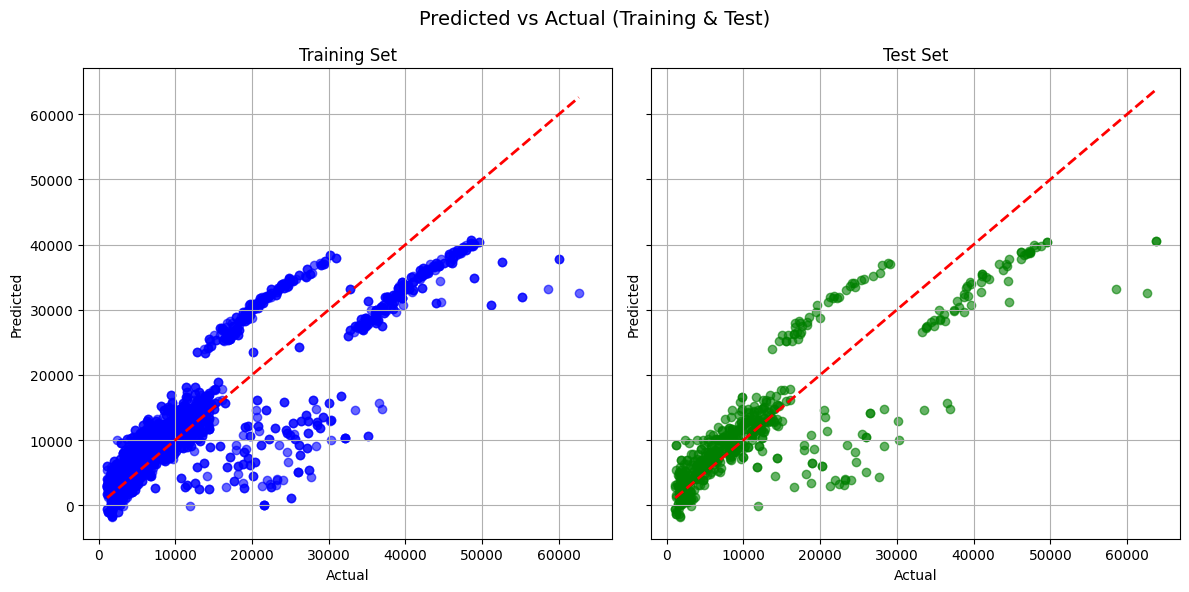

In [34]:
plot_predicted_actual(skl_multiple_model, X_train, X_test, y_train, y_test)

<div align="center">

# C. DNN LINEAR REGRESSION

</div>

## 20. Training

#### Create a tf_dnn_single_linear_regression() function

This function will train a DNN Linear Regression for each feature, it will loop through all the features and build all models and save them.

In [35]:
def tf_dnn_single_linear_regression(training_features, X_train, y_train, learning_rate=0.001, epochs=100, validation_split=0.2):
    # Store histories and models
    histories = []
    all_models = []
    
    for feature_name in training_features:
        # Prepare the data
        X_tr = X_train[feature_name].to_numpy().astype(np.float32).reshape(-1, 1)
        y_tr = y_train.to_numpy().astype(np.float32)
    
        # Normalization layer for this feature
        X_tr_normalizer = normalize(X_tr)
    
        # Build a simple DNN for 1 feature
        model = tf.keras.Sequential([
            X_tr_normalizer,
            layers.Dense(64, activation='relu'),   # hidden layer 1
            layers.Dense(32, activation='relu'),   # hidden layer 2
            layers.Dense(1)                        # output layer
        ])
    
        # Compile the model
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate),
            loss='mse',
            metrics=['mae']
        )
    
        # Train the model
        history = model.fit(
            X_tr, y_tr,
            epochs=epochs,
            verbose=0,
            validation_split=validation_split
        )
    
        # Extract final weights and bias from the last layer
        weights, bias = model.layers[-1].get_weights()
        all_models.append({
            'feature': feature_name,
            'model': model,
            'weight': weights[0][0],
            'bias': bias[0]
        })
    
        print(f"Training DNN with feature '{feature_name}' -- "
              f"weights: {weights[0][0]}, bias: {bias[0]}, "
              f"final loss: {history.history['loss'][-1]}")
    
        # Save the training history
        histories.append({
            'feature': feature_name,
            'history': history
        })

    return histories, all_models

#### Training a DNN Linear Regression with One feature

In [36]:
tf_dnn_single_history, tf_dnn_single_models = tf_dnn_single_linear_regression(training_features, X_train, y_train)

Training DNN with feature 'age' -- weights: 2.378793478012085, bias: 1.0940744876861572, final loss: 135391584.0
Training DNN with feature 'bmi' -- weights: -0.34945148229599, bias: 1.1131830215454102, final loss: 141326048.0
Training DNN with feature 'children' -- weights: -0.06332111358642578, bias: 1.303305983543396, final loss: 147165632.0
Training DNN with feature 'sex_male' -- weights: -0.3951992690563202, bias: 1.4434633255004883, final loss: 146884128.0
Training DNN with feature 'smoker_yes' -- weights: 3.0084080696105957, bias: 1.255289077758789, final loss: 53807996.0
Training DNN with feature 'region_northwest' -- weights: -0.13029885292053223, bias: 1.2059143781661987, final loss: 147268224.0
Training DNN with feature 'region_southeast' -- weights: -0.04121103882789612, bias: 1.1314847469329834, final loss: 146155248.0
Training DNN with feature 'region_southwest' -- weights: -0.2464856058359146, bias: 1.2860605716705322, final loss: 146661600.0


## 21. Testing and Plot Result

#### Plot the training loss of the model above using plot_single_loss()

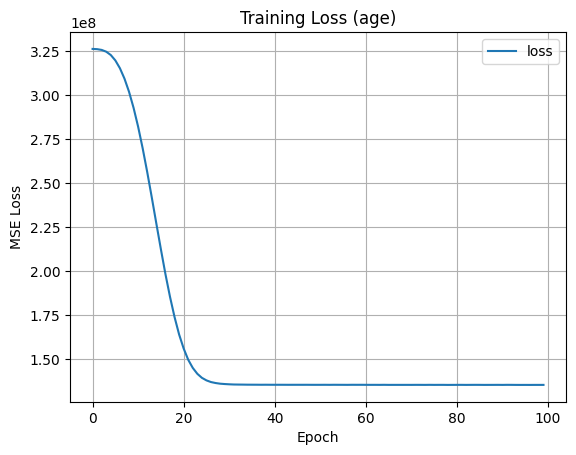

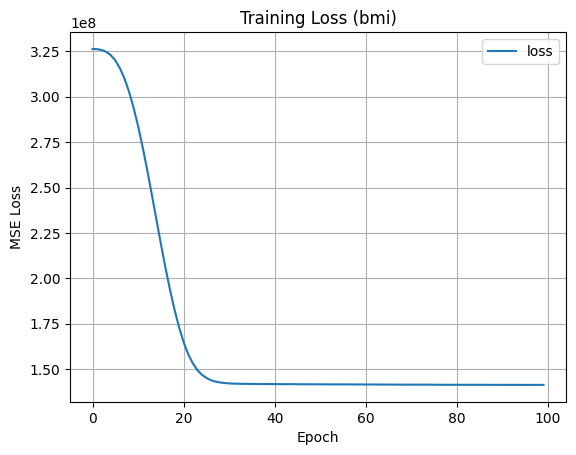

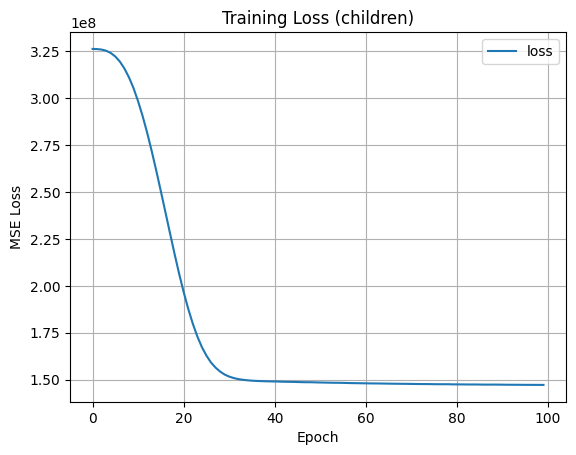

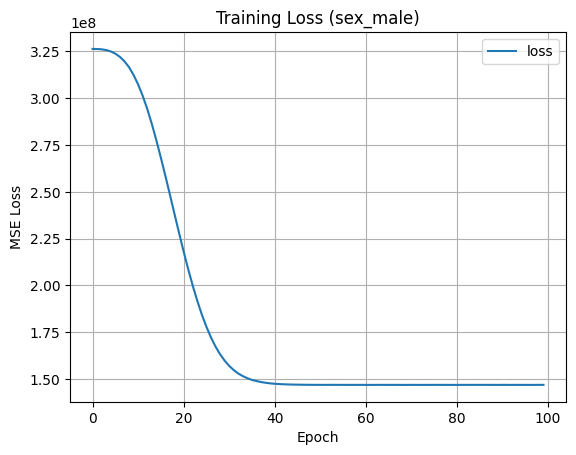

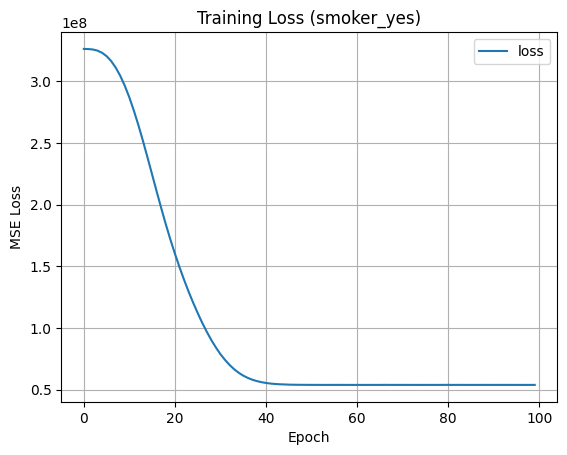

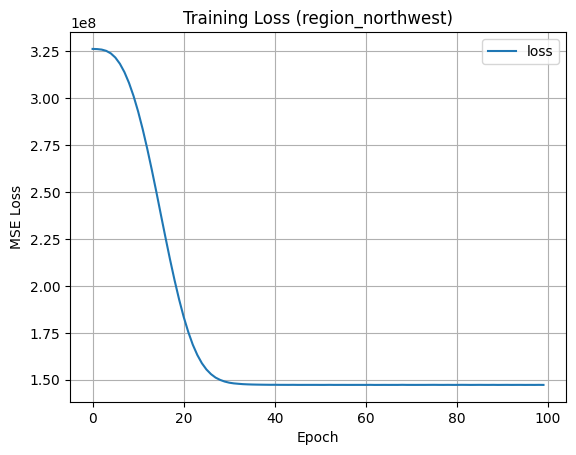

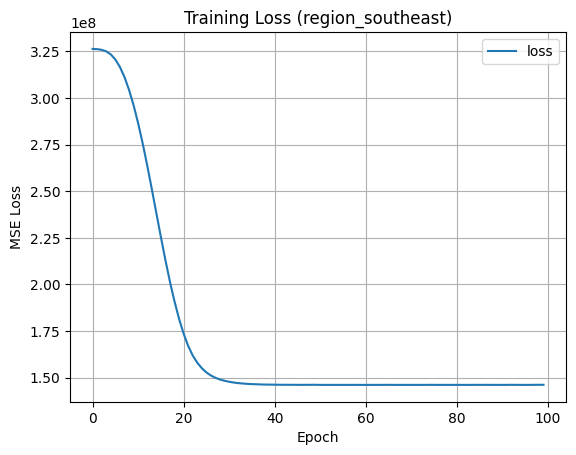

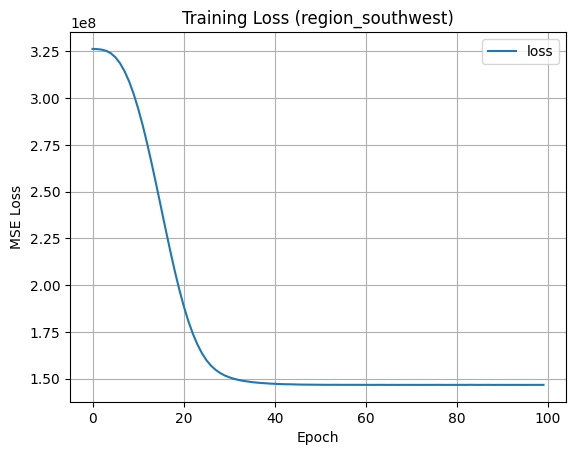

In [37]:
## Plot training loss
for history in tf_dnn_single_history:
    plot_single_loss(history['history'], feature_name=history['feature'])

#### Evaluate all the models above using evaluate_metrics

In [38]:
# evaluate against the metrics
evaluate_metrics(tf_dnn_single_models, training_features, X_train, X_test, y_train, y_test)

18/18 [==============================] - 0s 2ms/step


,Feature,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,age,11596.5086,11598.6979,0.0794,0.1235,9139.9124,9040.2582
1,bmi,11863.8310,12098.0879,0.0365,0.0464,9265.3719,9229.7450
2,children,12073.4394,12373.3175,0.0022,0.0025,9152.8154,9287.1532
3,sex_male,12058.4923,12391.8952,0.0046,-0.0005,9137.1378,9232.5594
4,smoker_yes,7372.3447,7842.1501,0.6279,0.5993,5590.6224,5918.2156
5,region_northwest,12078.8614,12389.9136,0.0013,-0.0002,9137.2737,9265.5956
6,region_southeast,12050.6106,12383.0179,0.0059,0.0009,9117.9730,9283.8759
7,region_southwest,12070.2550,12397.8092,0.0027,-0.0015,9109.0122,9215.0168


<div align='center'>
    
## MULTIPLE FEATURES
    
</div>

## 22. Training

#### Create a tf_dnn_multiple_linear_regression() function

This function will perform DNN linear_regression training for multiple features using Tensorflow

In [39]:
def tf_dnn_multiple_linear_regression(X_train, y_train, learning_rate=0.001, epochs=100, validation_split=0.2):
    # Prepare data
    X_tr = X_train.to_numpy().astype(np.float32)
    y_tr = y_train.to_numpy().astype(np.float32)
    
    # Normalize all features
    X_tr_normalizer = normalize_multiple(X_tr)
    
    # Build DNN model
    model = tf.keras.Sequential([
        X_tr_normalizer,
        layers.Dense(64, activation='relu'),   # hidden layer 1
        layers.Dense(32, activation='relu'),   # hidden layer 2
        layers.Dense(1)                        # output layer
    ])
    
    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),  # safer learning rate
        loss='mse',
        metrics=['mae']
    )
    
    # Train
    history = model.fit(
        X_tr, y_tr,
        epochs=epochs,
        verbose=0,
        validation_split=validation_split
    )
    
    # Save final weights and bias from output layer
    weights, bias = model.layers[-1].get_weights()
    print('Training With Multiple Features')
    print('Weights:', weights.flatten(), ', bias:', bias[0], ', final loss:', history.history['loss'][-1])
    
    # Save model
    final_model = {
        'model': model,
        'weight': weights,
        'bias': bias,
        'history': history
    }

    return final_model, history

#### Train a dnn multiple feature linear regression model using the function above

In [40]:
tf_dnn_multiple_model, tf_dnn_multiple_history = tf_dnn_multiple_linear_regression(X_train, y_train, epochs=1000)

Training With Multiple Features
Weights: [ -1.9308716    2.8627372    2.5485587    2.6299858    2.9089289
 -11.907037     2.678319   -16.774837     2.7331376   -0.37816274
   2.8730807    2.7202263    2.8229766    2.8603442    2.3221495
  -0.11632808   2.8542616    2.7655718   -0.30590895   2.8453035
   2.6251569   -5.568149   -14.353305     3.0429456  -11.028814
   2.8454747    2.7361612   -7.19878    -14.6893635    2.6878474
 -13.72074    -12.973778  ] , bias: -0.5646758 , final loss: 16607674.0


## 23. Testing and Plot Result

#### Plot the training loss using plot_single_loss()

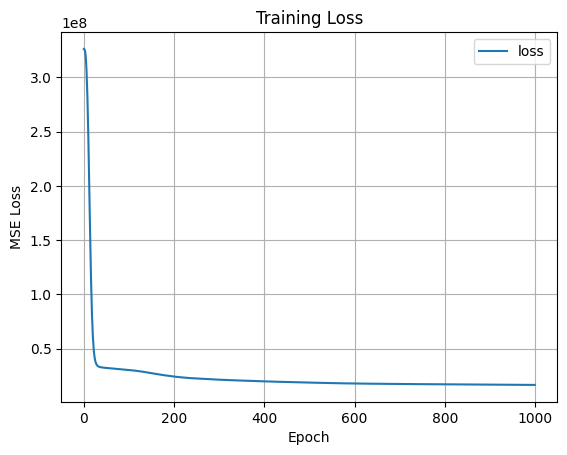

In [41]:
## Plot training loss
plot_single_loss(tf_dnn_multiple_history)

#### Evaluate the model using evaluate_metrics_multiple()

In [42]:
## evaluate the metrics
evaluate_metrics_multiple(tf_dnn_multiple_model, X_train, X_test, y_train, y_test)

18/18 [==============================] - 0s 919us/step


,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,4198.1551,4871.0696,0.8794,0.8454,2254.2642,2503.7439


#### Plot the predicted values and actual values of the dnn multiple feature linear regression above

18/18 [==============================] - 0s 2ms/step


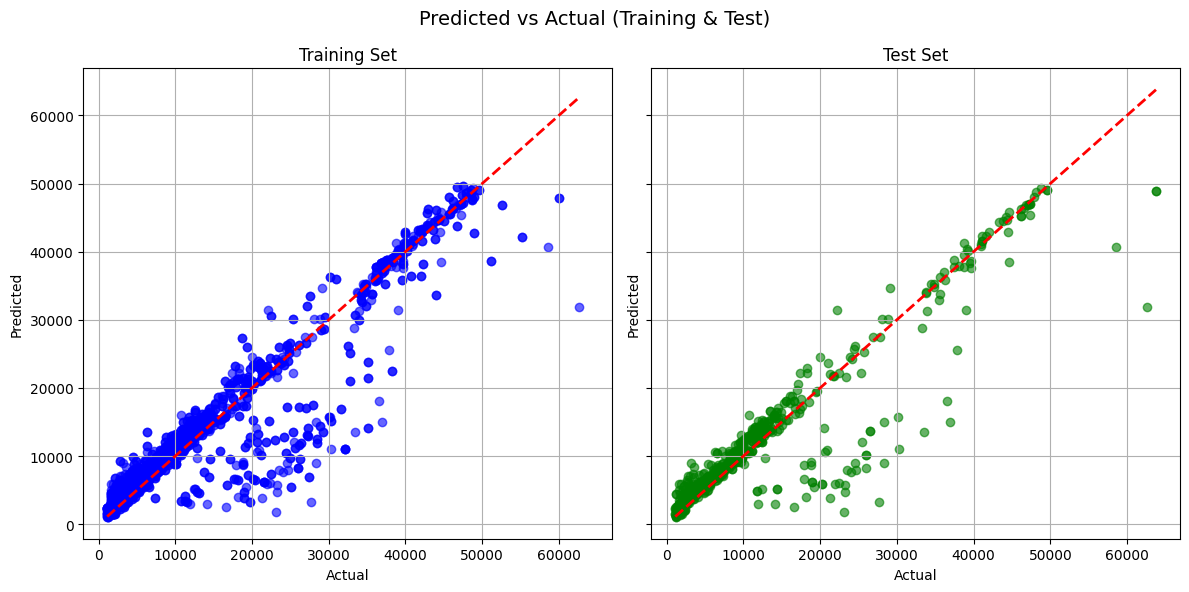

In [43]:
## plot the predicted and the actual
plot_predicted_actual(tf_dnn_multiple_model, X_train, X_test, y_train, y_test)

<div align="center">

# D. Performance Comparison

</div>

<div align='center'> 

### TENSORFLOW SINGLE FEATURE MODELS

<div/>

In [46]:
print('TENSORFLOW SINGLE FEATURE MODELS')
evaluate_metrics(tf_single_models, training_features, X_train, X_test, y_train, y_test)

TENSORFLOW SINGLE FEATURE MODELS
18/18 [==============================] - 0s 1ms/step


,Feature,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,age,11591.5868,11615.6235,0.0802,0.1209,9177.8108,9057.1175
1,bmi,11861.8718,12077.8847,0.0368,0.0496,9262.9878,9225.4256
2,children,12063.0875,12361.8402,0.0039,0.0043,9147.7942,9275.2709
3,sex_male,12058.5373,12392.6424,0.0046,-0.0006,9144.1642,9240.6851
4,smoker_yes,7372.5516,7839.9507,0.6279,0.5995,5588.3549,5915.4117
5,region_northwest,12078.8627,12390.9562,0.0013,-0.0004,9145.8638,9275.1493
6,region_southeast,12051.1586,12384.3951,0.0058,0.0007,9120.3888,9287.6434
7,region_southwest,12070.2941,12398.1599,0.0027,-0.0015,9111.2916,9217.5206


<div align='center'> 

### TENSORFLOW MULTIPLE FEATURE MODEL

<div/>

In [47]:
print('TENSORFLOW MULTIPLE FEATURE MODEL')
evaluate_metrics_multiple(tf_multiple_model, X_train, X_test, y_train, y_test)

TENSORFLOW MULTIPLE FEATURE MODEL
18/18 [==============================] - 0s 1ms/step


,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,6001.4886,6324.9955,0.7534,0.7393,4110.9952,4141.6159


<div align='center'> 

### SKLEARN SINGLE FEATURE MODELS

<div/>

In [48]:
print('SKLEARN SINGLE FEATURE MODELS')
evaluate_metrics(skl_single_models, training_features, X_train, X_test, y_train, y_test)

SKLEARN SINGLE FEATURE MODELS


,Feature,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,age,11591.1974,11617.9712,0.0803,0.1206,9144.4335,9025.4073
1,bmi,11860.4991,12082.5910,0.0370,0.0488,9239.5900,9212.2136
2,children,12063.0716,12361.0965,0.0039,0.0045,9145.6366,9272.6920
3,sex_male,12058.1375,12394.2664,0.0047,-0.0009,9142.6916,9234.4720
4,smoker_yes,7371.9222,7843.7887,0.6280,0.5991,5600.0851,5927.9225
5,region_northwest,12078.8518,12390.3370,0.0013,-0.0003,9141.6485,9270.4163
6,region_southeast,12048.8174,12377.8885,0.0062,0.0018,9118.7074,9278.4612
7,region_southwest,12068.1598,12392.9538,0.0030,-0.0007,9114.9924,9226.2244


<div align='center'> 

### SKLEARN MULTIPLE FEATURE MODEL

<div/>

In [49]:
print('SKLEARN MULTIPLE FEATURE MODEL')
evaluate_metrics_multiple(skl_multiple_model, X_train, X_test, y_train, y_test)

SKLEARN MULTIPLE FEATURE MODEL


C:\Users\PC\anaconda3\envs\appliedML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\envs\appliedML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,5999.3860,6319.2717,0.7536,0.7398,4133.8140,4160.2480


<div align='center'> 

### DNN SINGLE FEATURE MODELS

<div/>

In [50]:
print('DNN SINGLE FEATURE MODELS')
evaluate_metrics(tf_dnn_single_models, training_features, X_train, X_test, y_train, y_test)

DNN SINGLE FEATURE MODELS
18/18 [==============================] - 0s 2ms/step


,Feature,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,age,11596.5086,11598.6979,0.0794,0.1235,9139.9124,9040.2582
1,bmi,11863.8310,12098.0879,0.0365,0.0464,9265.3719,9229.7450
2,children,12073.4394,12373.3175,0.0022,0.0025,9152.8154,9287.1532
3,sex_male,12058.4923,12391.8952,0.0046,-0.0005,9137.1378,9232.5594
4,smoker_yes,7372.3447,7842.1501,0.6279,0.5993,5590.6224,5918.2156
5,region_northwest,12078.8614,12389.9136,0.0013,-0.0002,9137.2737,9265.5956
6,region_southeast,12050.6106,12383.0179,0.0059,0.0009,9117.9730,9283.8759
7,region_southwest,12070.2550,12397.8092,0.0027,-0.0015,9109.0122,9215.0168


<div align='center'> 

### DNN MULTIPLE FEATURE MODEL

<div/>

In [51]:
print('DNN MULTIPLE FEATURE MODEL')
evaluate_metrics_multiple(tf_dnn_multiple_model, X_train, X_test, y_train, y_test)

DNN MULTIPLE FEATURE MODEL
18/18 [==============================] - 0s 1ms/step


,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,4198.1551,4871.0696,0.8794,0.8454,2254.2642,2503.7439


<div align='center'> 

### VISUALIZATION FROM THE BEST MODEL

<div/>

18/18 [==============================] - 0s 1ms/step


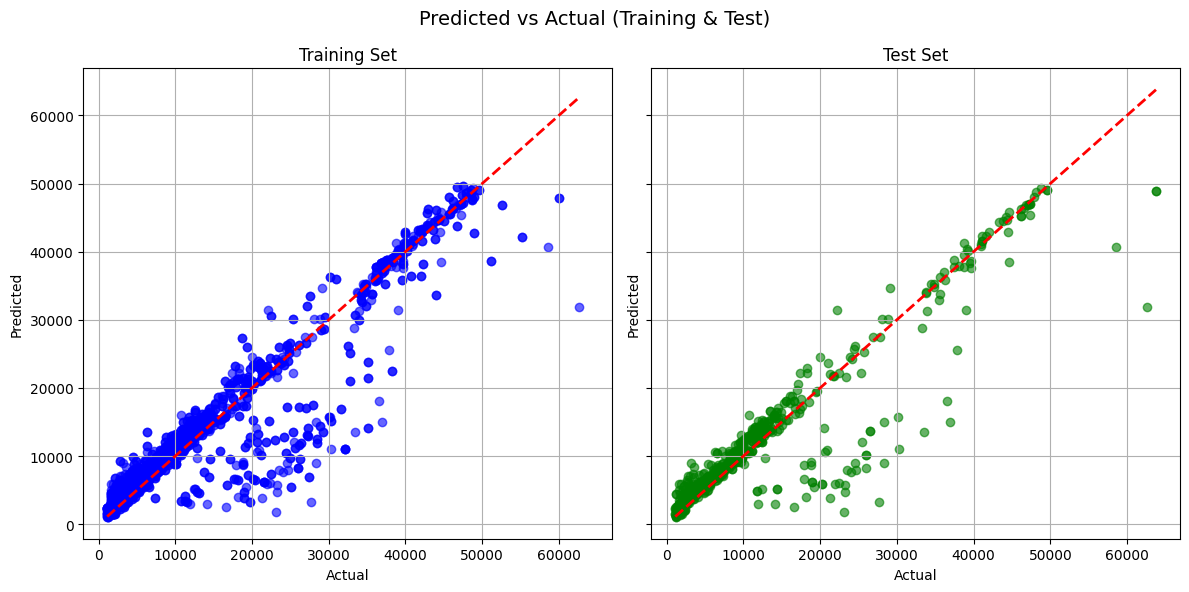

In [52]:
## plot the predicted and the actual
plot_predicted_actual(tf_dnn_multiple_model, X_train, X_test, y_train, y_test)